<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Resampling lab

---


<h1>Lab Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Resampling-lab" data-toc-modified-id="Resampling-lab-1">Resampling lab</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-the-AAPL-data-from-the-datasets-folder" data-toc-modified-id="Load-the-AAPL-data-from-the-datasets-folder-1.0.1">Load the AAPL data from the datasets folder</a></span></li><li><span><a href="#Sort-the-rows-by-Date-in-ascending-order" data-toc-modified-id="Sort-the-rows-by-Date-in-ascending-order-1.0.2">Sort the rows by <code>Date</code> in ascending order</a></span></li><li><span><a href="#Transform-the-Date-column-into-DateTime-format." data-toc-modified-id="Transform-the-Date-column-into-DateTime-format.-1.0.3">Transform the <code>Date</code> column into DateTime format.</a></span></li><li><span><a href="#Make-the-Date-column-the-index-of-the-DataFrame." data-toc-modified-id="Make-the-Date-column-the-index-of-the-DataFrame.-1.0.4">Make the <code>Date</code> column the index of the DataFrame.</a></span></li><li><span><a href="#Resample-the-time-series-to-report-weekly-or-annual-means." data-toc-modified-id="Resample-the-time-series-to-report-weekly-or-annual-means.-1.0.5">Resample the time series to report weekly or annual means.</a></span></li><li><span><a href="#Plot-the-timeseries-of-weekly-resampled-means-for-'Open','High','Low','Close'-and-compare-to-the-original-timeseries." data-toc-modified-id="Plot-the-timeseries-of-weekly-resampled-means-for-'Open','High','Low','Close'-and-compare-to-the-original-timeseries.-1.0.6">Plot the timeseries of weekly resampled means for <code>'Open','High','Low','Close'</code> and compare to the original timeseries.</a></span></li><li><span><a href="#Rolling-windows" data-toc-modified-id="Rolling-windows-1.0.7">Rolling windows</a></span><ul class="toc-item"><li><span><a href="#Test-different-window-sizes-and-frequencies." data-toc-modified-id="Test-different-window-sizes-and-frequencies.-1.0.7.1">Test different window sizes and frequencies.</a></span></li><li><span><a href="#Plot-the-time-series-across-the-moving-window" data-toc-modified-id="Plot-the-time-series-across-the-moving-window-1.0.7.2">Plot the time series across the moving window</a></span></li></ul></li><li><span><a href="#Use-.diff()-to-calculate-changes-in-values-from-day-to-day" data-toc-modified-id="Use-.diff()-to-calculate-changes-in-values-from-day-to-day-1.0.8">Use <code>.diff()</code> to calculate changes in values from day to day</a></span></li><li><span><a href="#What-is-the-difference-between-applying-.diff(2)-and-.diff().diff()?" data-toc-modified-id="What-is-the-difference-between-applying-.diff(2)-and-.diff().diff()?-1.0.9">What is the difference between applying <code>.diff(2)</code> and <code>.diff().diff()</code>?</a></span></li><li><span><a href="#Use-df.pct_change()-to-calculate-percent-changes-from-day-to-day" data-toc-modified-id="Use-df.pct_change()-to-calculate-percent-changes-from-day-to-day-1.0.10">Use <code>df.pct_change()</code> to calculate percent changes from day to day</a></span></li><li><span><a href="#Shifting" data-toc-modified-id="Shifting-1.0.11">Shifting</a></span></li><li><span><a href="#Undoing-differencing" data-toc-modified-id="Undoing-differencing-1.0.12">Undoing differencing</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Load the AAPL data from the datasets folder


- `Close`: The price of AAPL when the stock market closes (at 4:30pm ET)
- `High`: The highest price of AAPL during that trading day
- `Low`: The lowest price of AAPL during that trading day
- `Open`: The price of AAPL when the stock market opens (at 9:30am ET)
- `Volume`: How many shares of AAPL were traded that day

In [2]:
df = pd.read_csv('./datasets/aapl.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-13,119.11,119.62,118.81,119.04,26111948
1,2017-01-12,118.90,119.30,118.21,119.25,27086220
2,2017-01-11,118.74,119.93,118.60,119.75,27588593
3,2017-01-10,118.77,119.38,118.30,119.11,24462051
4,2017-01-09,117.95,119.43,117.94,118.99,33561948


### Sort the rows by `Date` in ascending order

In [3]:
df = df.sort_values('Date')
df.reset_index(drop=True, inplace=True)

### Transform the `Date` column into DateTime format.

In [4]:
df['Date'] = pd.to_datetime(df.Date)
df.Date[0]

Timestamp('2016-01-19 00:00:00')

### Make the `Date` column the index of the DataFrame.

Making the index a datetime allows us to easily order the data by time. Doing this will result in dataframe objects indexed by DateTime - literally Time Series!

In [5]:
df.set_index('Date',inplace=True,drop=True)

In [6]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-19,98.41,98.65,95.50,96.66,52841349
2016-01-20,95.10,98.19,93.42,96.79,72008265
2016-01-21,97.06,97.88,94.94,96.30,52054521
2016-01-22,98.63,101.46,98.37,101.42,65562769
2016-01-25,101.52,101.53,99.21,99.44,51196375


In [7]:
df.index.name = None

In [8]:
df.head()

,Open,High,Low,Close,Volume
2016-01-19,98.41,98.65,95.50,96.66,52841349
2016-01-20,95.10,98.19,93.42,96.79,72008265
2016-01-21,97.06,97.88,94.94,96.30,52054521
2016-01-22,98.63,101.46,98.37,101.42,65562769
2016-01-25,101.52,101.53,99.21,99.44,51196375


### Resample the time series to report weekly or annual means.

Applying `.resample(freq)` to a pandas timeseries with a specified frequency, e.g. `'W'` or `'A'`, followed by an aggregation function like `.mean()`, creates aggregates across the indicated frequency (similar to `group by`).

In [9]:
df.resample('W').mean().head()

,Open,High,Low,Close,Volume
2016-01-24,97.3000,99.0450,95.5575,97.7925,60616726.00
2016-01-31,97.2140,98.1800,95.4720,96.8560,73305286.00
2016-02-07,95.8540,96.7680,94.5280,95.5760,43027459.80
2016-02-14,94.2640,95.4420,93.3340,94.3920,46033610.20
2016-02-21,96.6325,97.6775,95.6625,96.7650,41215217.25


In [10]:
df.resample('A').mean().head()

,Open,High,Low,Close,Volume
2016-12-31,104.694669,105.601942,103.916860,104.816157,3.710878e+07
2017-12-31,117.535556,118.391111,117.183333,118.092222,2.696180e+07


In [11]:
df.resample('A').apply([pd.DataFrame.mean,pd.DataFrame.std]).T

2016-12-31    2017-12-31
Open   mean  1.046947e+02  1.175356e+02
       std   7.669289e+00  1.437055e+00
High   mean  1.056019e+02  1.183911e+02
       std   7.641991e+00  1.455425e+00
Low    mean  1.039169e+02  1.171833e+02
       std   7.739985e+00  1.493670e+00
Close  mean  1.048162e+02  1.180922e+02
       std   7.704667e+00  1.463103e+00
Volume mean  3.710878e+07  2.696180e+07
       std   1.625768e+07  4.093951e+06

### Plot the timeseries of weekly resampled means for `'Open','High','Low','Close'` and compare to the original timeseries.

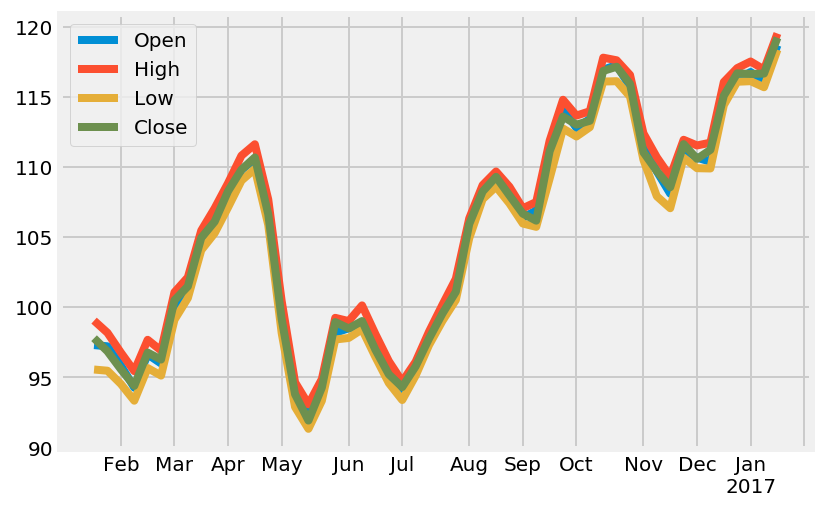

In [12]:
df.resample('W').mean()[['Open','High','Low','Close']].plot();

### Rolling windows

You can specify window sizes like

`df.rolling(window=7).mean()`

or 

`df.rolling(window='5D').mean()`.


The window function has the following parameters:

- **`window`** indicates the number of days to include in the average.
- **`center`** indicates whether the window should be centered on the date or use data prior to that date.
- **`freq`** indicates which level to roll the averages up to (as used in **`resample`**): **`D`** for day, **`M`** for month, **`A`** for year, etc.

> **Note:** For more information, see Pandas' [resample documentation](http://stackoverflow.com/questions/17001389/pandas-resample-documentation).

#### Test different window sizes and frequencies. 

- Why are there missing values?
- Test the different options for `center`.

In [13]:
df.rolling(window=5,center=False).mean().head(10)

,Open,High,Low,Close,Volume
2016-01-19,NaN,NaN,NaN,NaN,NaN
2016-01-20,NaN,NaN,NaN,NaN,NaN
2016-01-21,NaN,NaN,NaN,NaN,NaN
2016-01-22,NaN,NaN,NaN,NaN,NaN
2016-01-25,98.144,99.542,96.288,98.122,58732655.8
2016-01-26,98.448,99.988,96.802,98.788,60872047.0
2016-01-27,98.636,99.676,96.786,98.114,72915294.0
2016-01-28,97.982,99.004,96.276,97.672,73615811.6
2016-01-29,97.214,98.180,95.472,96.856,73305286.0
2016-02-01,96.204,97.216,94.710,96.254,71180329.6


In [14]:
df.rolling(window='5D').mean().head()

,Open,High,Low,Close,Volume
2016-01-19,98.410000,98.650,95.500000,96.660000,5.284135e+07
2016-01-20,96.755000,98.420,94.460000,96.725000,6.242481e+07
2016-01-21,96.856667,98.240,94.620000,96.583333,5.896804e+07
2016-01-22,97.300000,99.045,95.557500,97.792500,6.061673e+07
2016-01-25,99.070000,100.290,97.506667,99.053333,5.627122e+07


#### Plot the time series across the moving window

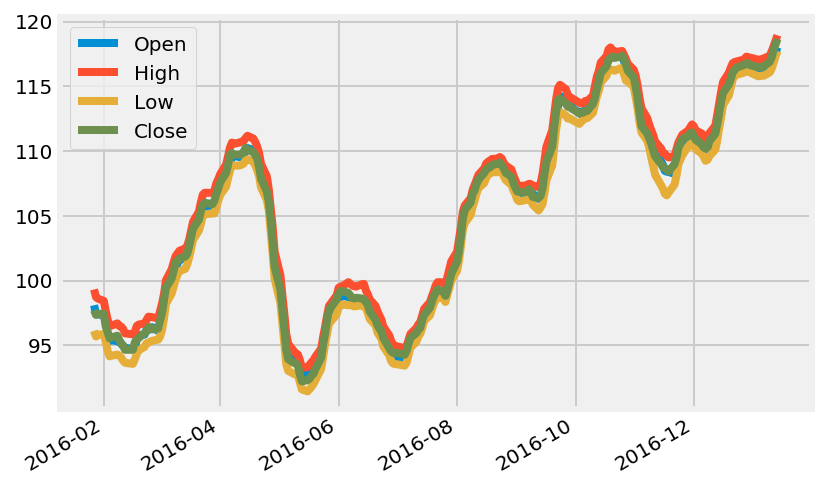

In [15]:
df[['Open','High','Low','Close']].rolling(window=7).mean().plot();

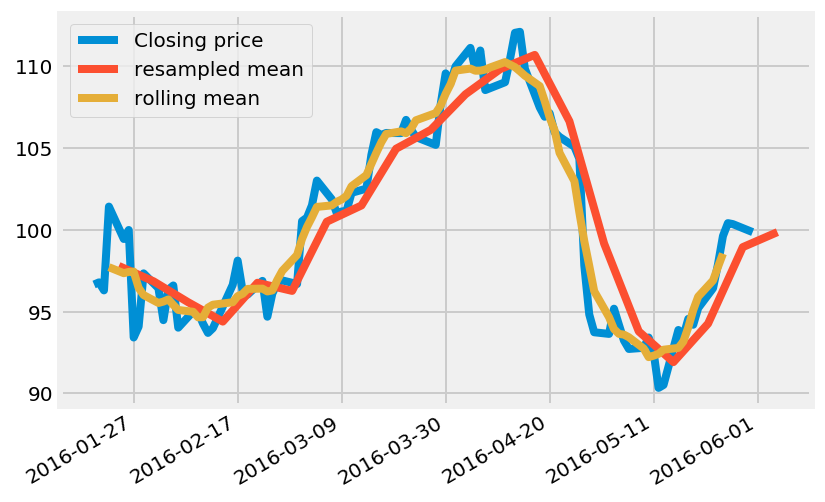

In [16]:
ax = df.loc[df.index<'2016-06','Close'].plot(label='Closing price')
df.loc[df.index<'2016-06','Close'].resample('W').mean().plot(ax=ax,label='resampled mean')
df.loc[df.index<'2016-06','Close'].rolling(window=7,center=True).mean().plot(ax=ax,label='rolling mean')
plt.legend();

### Use `.diff()` to calculate changes in values from day to day

- Why do you get missing values?
- Plot the resulting time series. Compare to the original time series.

In [17]:
df.diff().head()

,Open,High,Low,Close,Volume
2016-01-19,NaN,NaN,NaN,NaN,NaN
2016-01-20,-3.31,-0.46,-2.08,0.13,19166916.0
2016-01-21,1.96,-0.31,1.52,-0.49,-19953744.0
2016-01-22,1.57,3.58,3.43,5.12,13508248.0
2016-01-25,2.89,0.07,0.84,-1.98,-14366394.0


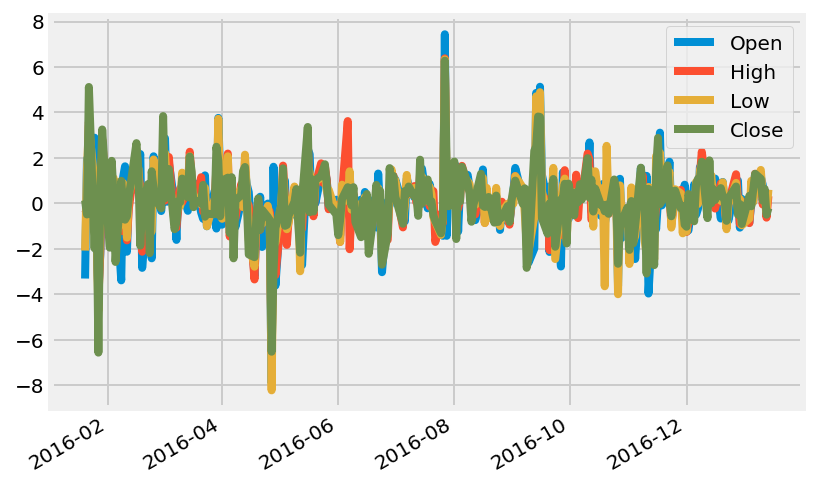

In [18]:
df.diff()[['Open','High','Low','Close']].plot();

### What is the difference between applying `.diff(2)` and `.diff().diff()`?

In [19]:
df.diff(2).head()

,Open,High,Low,Close,Volume
2016-01-19,NaN,NaN,NaN,NaN,NaN
2016-01-20,NaN,NaN,NaN,NaN,NaN
2016-01-21,-1.35,-0.77,-0.56,-0.36,-786828.0
2016-01-22,3.53,3.27,4.95,4.63,-6445496.0
2016-01-25,4.46,3.65,4.27,3.14,-858146.0


In [20]:
df.diff().diff().head()

,Open,High,Low,Close,Volume
2016-01-19,NaN,NaN,NaN,NaN,NaN
2016-01-20,NaN,NaN,NaN,NaN,NaN
2016-01-21,5.27,0.15,3.60,-0.62,-39120660.0
2016-01-22,-0.39,3.89,1.91,5.61,33461992.0
2016-01-25,1.32,-3.51,-2.59,-7.10,-27874642.0


### Use `df.pct_change()` to calculate percent changes from day to day

- Plot the resulting time series. Compare to the original time series.

In [21]:
df.pct_change().head()

,Open,High,Low,Close,Volume
2016-01-19,NaN,NaN,NaN,NaN,NaN
2016-01-20,-0.033635,-0.004663,-0.021780,0.001345,0.362726
2016-01-21,0.020610,-0.003157,0.016271,-0.005063,-0.277104
2016-01-22,0.016176,0.036575,0.036128,0.053167,0.259502
2016-01-25,0.029301,0.000690,0.008539,-0.019523,-0.219124


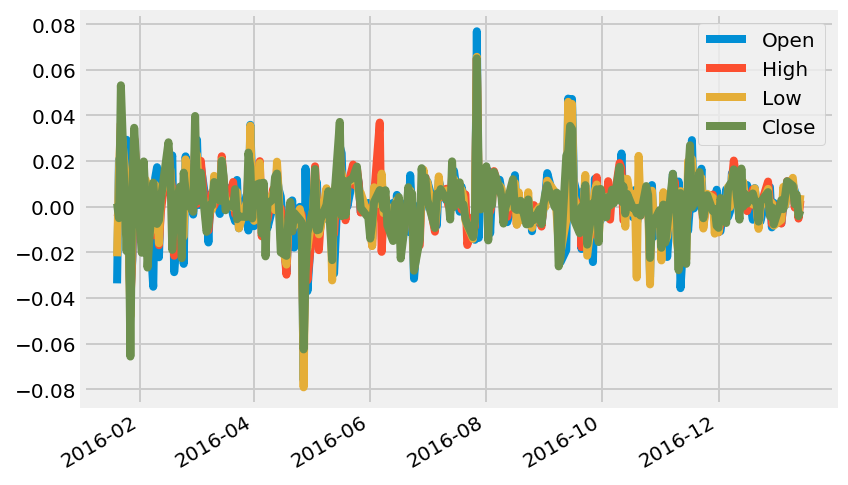

In [22]:
df.pct_change()[['Open','High','Low','Close']].plot();

### Shifting

`df.shift()` is used to bring values from previous dates forward in time.

- How is that different from `.diff()`?

In [23]:
df.shift().head()

,Open,High,Low,Close,Volume
2016-01-19,NaN,NaN,NaN,NaN,NaN
2016-01-20,98.41,98.65,95.50,96.66,52841349.0
2016-01-21,95.10,98.19,93.42,96.79,72008265.0
2016-01-22,97.06,97.88,94.94,96.30,52054521.0
2016-01-25,98.63,101.46,98.37,101.42,65562769.0


### Undoing differencing

What would you do to reobtain the original time series after having applied `.diff()`?

In [24]:
df_diff = df.diff()

In [25]:
# Replace the first row of missing values with the first row of the original dataframe
df_diff.iloc[0,:] = df.iloc[0,:].values

# Calculate the cumulative sum along the values in all rows
df_restored = df_diff.apply(np.cumsum,axis='rows')

# Check that the restored dataframe matches the original one
np.allclose(df_restored,df)

True